<a href="https://colab.research.google.com/github/LeonimerMelo/python/blob/main/Simple_Polynomial_Regression_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the *nth* degree polynomial.

Polynomial Regression models are usually fit with the method of least squares.The least square method minimizes the variance of the coefficients,under the Gauss Markov Theorem.

Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.

In statistics, Polynomial Regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an nth degree polynomial in $x$. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$, denoted $E(y |x)$. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function $E(y | x)$ is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 510.0, 586.0])
X = X.reshape(-1, 1)
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 379.0, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

lr.fit(X, y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

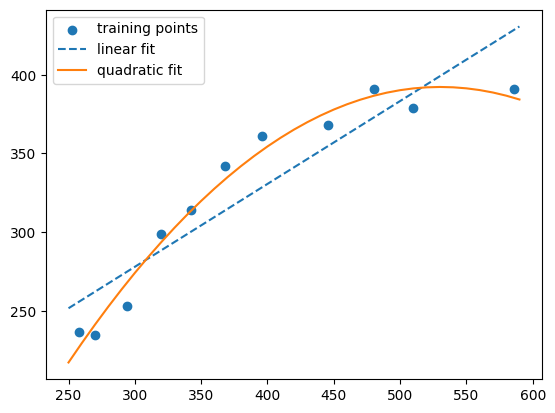

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [3]:
from sklearn.metrics import mean_squared_error
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred)))

Training MSE linear: 528.746, quadratic: 73.697


In [4]:
from sklearn.metrics import r2_score
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y, y_lin_pred), r2_score(y, y_quad_pred)))

Training R^2 linear: 0.843, quadratic: 0.978


# coeficiente de determinação
O coeficiente de determinação, também chamado de **R²** ou **R2**, é uma medida de ajuste de um modelo estatístico linear generalizado, como a *regressão linear* simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

## Método $R^2$

$$SQ_{\text{tot}}=\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}$$

onde $\displaystyle n$ é o numero de observações. Partindo de que $y_{i}$ é o valor observado e $\bar {y}$ é a média das observações, esta equação dá-nos a *Soma Total dos Quadrados*, ou seja, a soma dos quadrados das diferenças entre a média e cada valor observado.

$$SQ_{\text{res}}=\sum _{i=1}^{n}(y_{i}-{\hat {y}_i})^{2}$$

onde $\hat {y_{i}}$ é o valor estimado (previsão) de $y_{i}$. Esta equação é a soma dos quadrados dos resíduos, que calcula a parte que não é explicada pelo modelo.

$$SQ_{\text{exp}}=\sum _{i=1}^{n}({\hat {y_{i}}}-{\bar {y}})^{2}$$

onde $\hat {y_{i}}$ é o valor estimado (previsão) de $y_{i}$. Esta equação, a soma dos quadrados explicada, indica-nos a diferença entre a média das observações e o valor estimado para cada observação, e soma os respectivos quadrados. Quanto menor for a diferença, maior poder explicativo detém o modelo.

Em alguns casos temos:
$$SQ_{\text{tot}} = SQ_{\text{res}}+ SQ_{\text{exp}}$$

E normalizando a equação de cima, temos que:
$$R^{2}={\frac {SQ_{\text{exp}}}{SQ_{\text{tot}}}}=1-{\frac {SQ_{\text{res}}}{SQ_{\text{tot}}}}$$

# Exercícios

1. Utilize polinômios de grau 3, 4 e 5 nos cálculos da regressão polinomial. Compare os resultados com a regressão quadrática.
2. Aumente o banco de dados (*data augmentation*) dobrando a quantidade de amostras. Para isso, utilize a média entre duas amostras originais para criar uma nova amostra fictícia. Compare os resultados.
3. Utilize a bibliteca make_moons para criar um banco de dados com 200 amostras, conforme exemplo abaixo. Utilize a regressão polinomial e verifique, através das métricas e dos gráficos, qual grau vai se ajustar melhor no banco de dados.

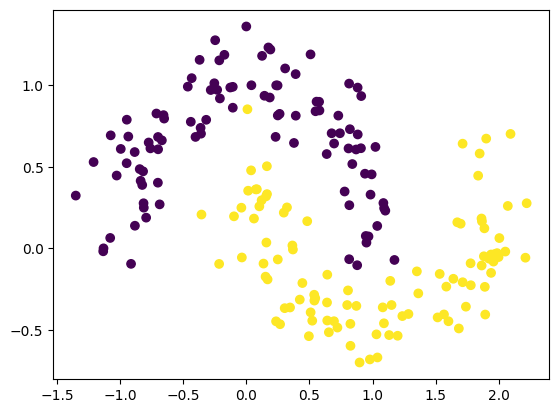

In [ ]:
# exemplo da função 'make_moons' do exercício 3
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.15, random_state=42)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

## Referências

[1] https://www.javatpoint.com/machine-learning-polynomial-regression

[2] https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb

[3] https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18